# **RNN**(Recurrent Neural Network)

RNN은 순차적인 데이터를 처리하는데에 사용되는 인공신경망의 한 종류입니다. <br>

> **특징**

이전 단계의 출력값이 현재 단계의 입력값으로 반복적으로 들어가는 구조입니다.

> **사용처**

**자연어 처리**를 비롯한 순차적 데이터를 이용하는 분야 대부분.


# **LSTM**(Long Short Term Memory)

RNN의 일종으로, 입력의 일부 정보가 장기적으로 보존되지 않고 손실되는 문제를 해결할 수 있도록 한 방법. <br>
내부 상태를 업데이트하는 방식을 좀 더 복잡하게 만들어서, 불필요한 정보를 제거하고 중요한 정보를 보존할 수 있도록 합니다.

> **오늘의 목표**

함수도 일종의 시계열 데이터처럼 해석할 수 있습니다. 즉, 이전 값을 통해 다음 값을 알아낼 수 있습니다. 이 사인함수의 이전 값이 주어지면 현재 값을 찾아내는 모델을 LSTM으로 구현해봅시다.

LSTM에 대한 더욱 자세한 내용은 다음 시간에 다루어보는 것으로 합시다. (자연어 처리를 배운 이후)

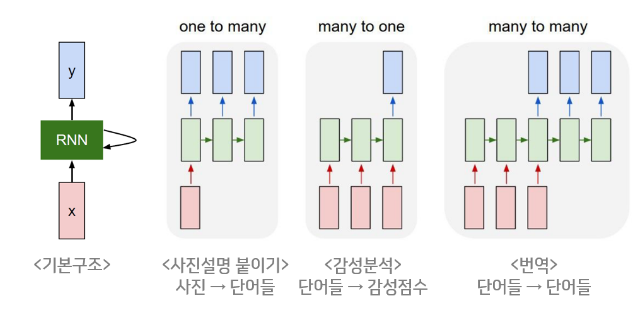

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# 시계열 데이터 생성
data = np.sin(np.arange(200) * np.pi / 50).reshape(200, 1)

# 데이터 전처리 함수
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    # look_back 개의 데이터로부터 다음 데이터를 예측하는 데이터셋 생성
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # i번째부터 look_back개의 데이터
        dataX.append(a)  # input 데이터
        dataY.append(dataset[i + look_back, 0])  # output 데이터
    return np.array(dataX), np.array(dataY)

# 데이터 전처리
look_back = 3  # LSTM 모델의 input 차원
trainX, trainY = create_dataset(data, look_back)  # LSTM 모델에 입력할 데이터셋 생성

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [ ]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))  # LSTM 레이어 추가
model.add(Dense(1))  # output 레이어 추가
model.compile(loss='mean_squared_error', optimizer='adam')  # 모델 컴파일

# 모델 학습
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)  # 학습

Epoch 1/100
196/196 - 2s - loss: 0.2247 - 2s/epoch - 12ms/step
Epoch 2/100
196/196 - 0s - loss: 0.0541 - 360ms/epoch - 2ms/step
Epoch 3/100
196/196 - 0s - loss: 0.0144 - 350ms/epoch - 2ms/step
Epoch 4/100
196/196 - 0s - loss: 0.0117 - 340ms/epoch - 2ms/step
Epoch 5/100
196/196 - 0s - loss: 0.0114 - 335ms/epoch - 2ms/step
Epoch 6/100
196/196 - 0s - loss: 0.0109 - 336ms/epoch - 2ms/step
Epoch 7/100
196/196 - 0s - loss: 0.0105 - 375ms/epoch - 2ms/step
Epoch 8/100
196/196 - 0s - loss: 0.0101 - 446ms/epoch - 2ms/step
Epoch 9/100
196/196 - 0s - loss: 0.0098 - 359ms/epoch - 2ms/step
Epoch 10/100
196/196 - 0s - loss: 0.0093 - 363ms/epoch - 2ms/step
Epoch 11/100
196/196 - 0s - loss: 0.0089 - 335ms/epoch - 2ms/step
Epoch 12/100
196/196 - 0s - loss: 0.0084 - 352ms/epoch - 2ms/step
Epoch 13/100
196/196 - 0s - loss: 0.0079 - 339ms/epoch - 2ms/step
Epoch 14/100
196/196 - 0s - loss: 0.0076 - 353ms/epoch - 2ms/step
Epoch 15/100
196/196 - 0s - loss: 0.0070 - 331ms/epoch - 2ms/step
Epoch 16/100
196/196 

In [ ]:
# 모델 예측
test_input = np.array([0.1, 0.2, 0.3])  # 테스트 데이터 입력
test_input = test_input.reshape(1, 1, look_back)  # 모델에 입력하기 위해 reshape
test_output = model.predict(test_input, verbose=0)  # 모델 예측
print(test_output)  # 결과 출력

[[0.3962436]]
